In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

previous_application= dd.read_csv("../../data/previous_application.csv").compute()
a = previous_application.shape
print("previous_application shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)
previous_application shape :(1670214,37)


In [3]:
previous_application=application_train[['TARGET','SK_ID_CURR']].merge(previous_application,on='SK_ID_CURR',how ='left')
del application_train

In [4]:
previous_application.shape

(1430155, 38)

<h2>TARGET / NAME_CONTRACT_TYPE</h2>

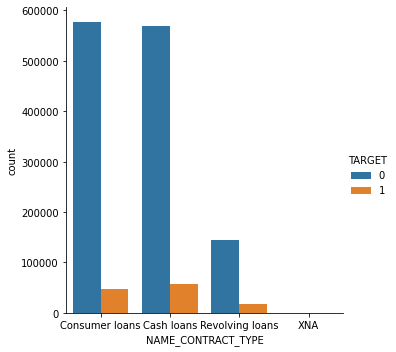

In [5]:
sns.catplot(x='NAME_CONTRACT_TYPE', kind="count",hue='TARGET', data=previous_application)

* Le produit cash loans est plus risque

<h2>TARGET / AMT_ANNUITY</h2>

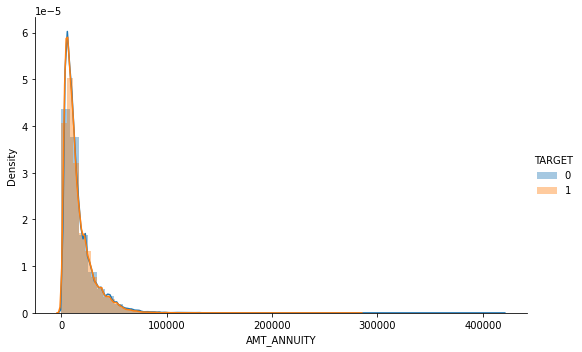

In [6]:
sns.FacetGrid(data=previous_application, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_ANNUITY').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

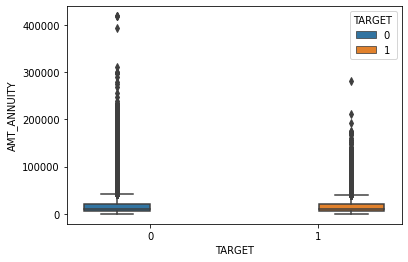

In [7]:
sns.boxplot(x='TARGET', y='AMT_ANNUITY',hue='TARGET', data=previous_application)

* Les distributions sont les memes pour les deux classes

<h2>TARGET / AMT_APPLICATION (Pour combien de crédit le client a demandé sur la demande précédente)</h2>

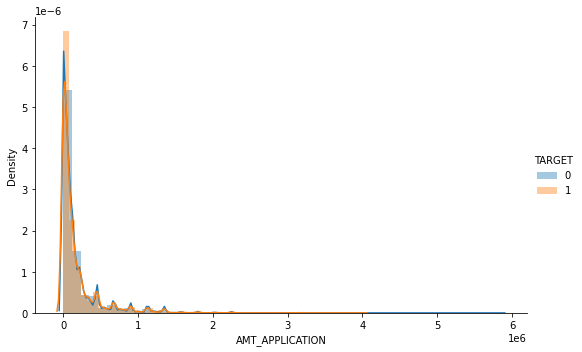

In [8]:
sns.FacetGrid(data=previous_application, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_APPLICATION').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_APPLICATION'>

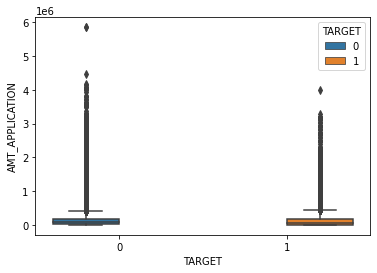

In [9]:
sns.boxplot(x='TARGET', y='AMT_APPLICATION',hue='TARGET', data=previous_application)

* Distribution presque la meme pour les deux classes 
* outliers >5e6

<h2>TARGET / AMT_CREDIT (Montant de crédit final sur la demande précédente. Cela diffère d'AMT_Application d'une manière que l'AMT_Application est le montant pour lequel le client a initialement demandé, mais pendant notre processus d'approbation, il aurait pu recevoir un montant différent - AMT_CREDIT)</h2>

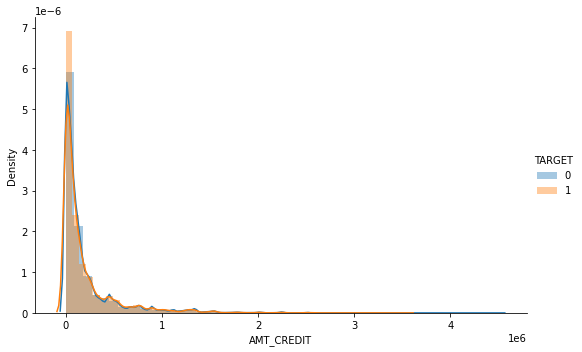

In [11]:
sns.FacetGrid(data=previous_application, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_CREDIT').add_legend()

In [17]:
previous_application["Same_credit"]=0
i=0
for j in previous_application.index:

    if(previous_application.iloc[j].AMT_APPLICATION-previous_application.iloc[j].AMT_CREDIT ==0):
       previous_application.iloc[j]["Same_credit"]=1
       i+=1

print("Pourcentage des gens qui ont le meme montant demande sont :",i/1430155)

Pourcentage des gens qui ont le meme montant demande sont : 0.38005740636504437


<h2>TARGET / AMT_DOWN_PAYMENT (Acompte sur la demande précédente)</h2>

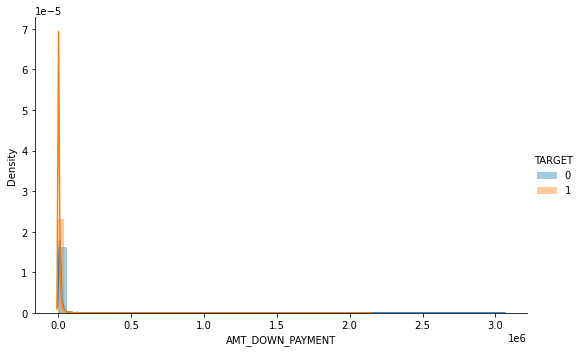

In [18]:
sns.FacetGrid(data=previous_application, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_DOWN_PAYMENT').add_legend()

<h2>TARGET / AMT_GOODS_PRICE</h2>

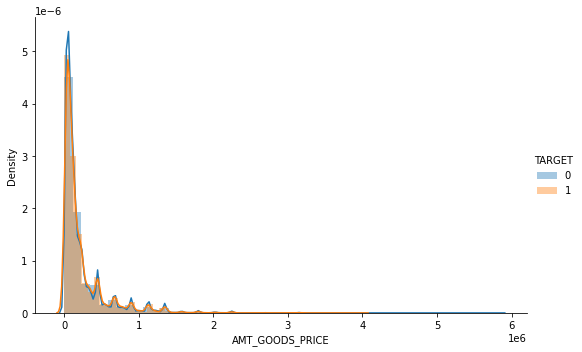

In [19]:
sns.FacetGrid(data=previous_application, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_GOODS_PRICE').add_legend()

<h2>TARGET / WEEKDAY_APPR_PROCESS_START (Jour de la demande)</h2>

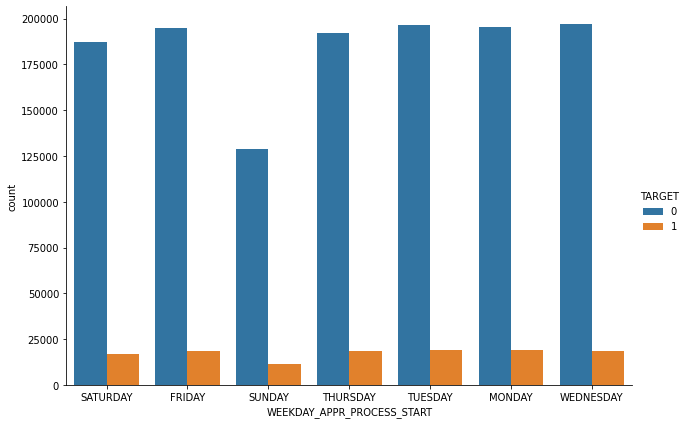

In [27]:
sns.catplot(x='WEEKDAY_APPR_PROCESS_START', kind="count",hue='TARGET', data=previous_application, aspect=1.5, height=6)

* Dimanche et samedi ???

<h2>TARGET / HOUR_APPR_PROCESS_START ( heure de la demande du credit)</h2>

In [21]:
previous_application.HOUR_APPR_PROCESS_START.describe()

count    1.413701e+06
mean     1.247893e+01
std      3.331474e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64

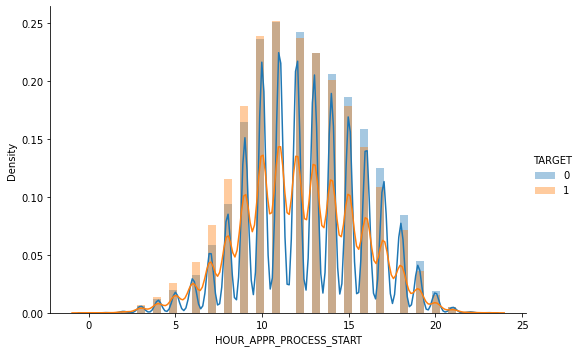

In [22]:
sns.FacetGrid(data=previous_application, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'HOUR_APPR_PROCESS_START').add_legend()

<h2>TARGET / FLAG_LAST_APPL_PER_CONTRACT (Flag Si c'était la dernière demande de contrat précédent. Parfois, par erreur de client ou de notre commis, il pourrait y avoir plus de demandes pour un seul contrat) </h2>

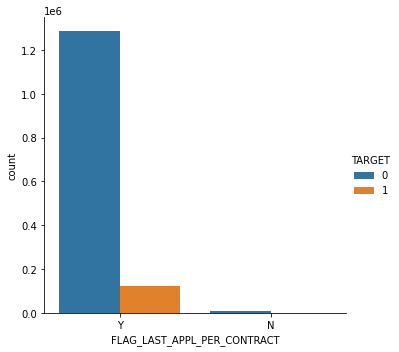

In [23]:
sns.catplot(x='FLAG_LAST_APPL_PER_CONTRACT', kind="count",hue='TARGET', data=previous_application)

<h2>TARGET / NFLAG_LAST_APPL_IN_DAY (Flag Si la demande était la dernière application par jour du client. Parfois, les clients demandent plus de demandes par jour. Il pourrait rarement être une erreur dans notre système qu'une application est dans la base de données deux fois)</h2>

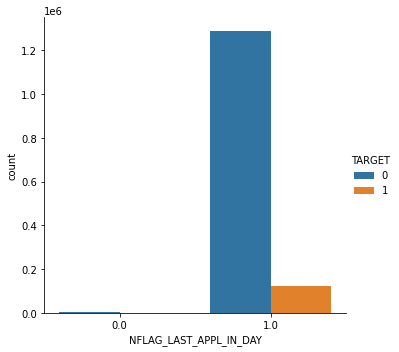

In [24]:
sns.catplot(x='NFLAG_LAST_APPL_IN_DAY', kind="count",hue='TARGET', data=previous_application)

<h2>TARGET / NAME_CASH_LOAN_PURPOSE(Objectif du prêt en espèces)</h2>

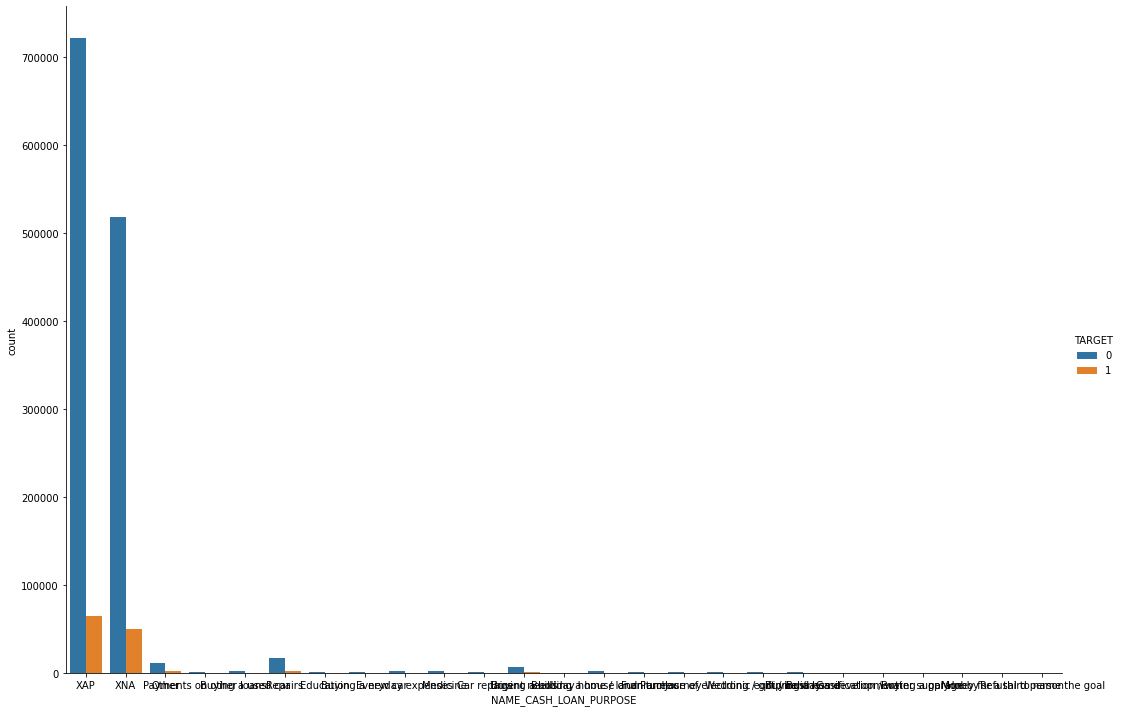

In [29]:
sns.catplot(x='NAME_CASH_LOAN_PURPOSE', kind="count",hue='TARGET', data=previous_application, aspect=1.5, height=10)

* Beaucoup des classes 
* XNA semble les plus risque

<h2>TARGET / NAME_CONTRACT_STATUS (État du contrat (approuvé, annulé, ...) de la demande précédente)</h2>

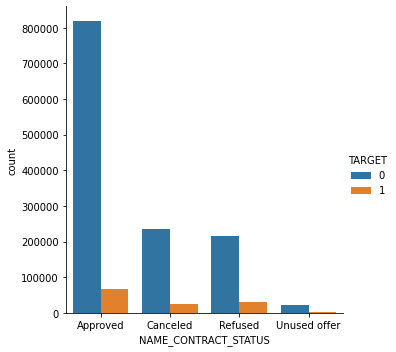

In [26]:
sns.catplot(x='NAME_CONTRACT_STATUS', kind="count",hue='TARGET', data=previous_application)

* Ce qui est deja refuse semble risque

<h2>TARGET / NAME_PAYMENT_TYPE( methode de paiement)</h2>

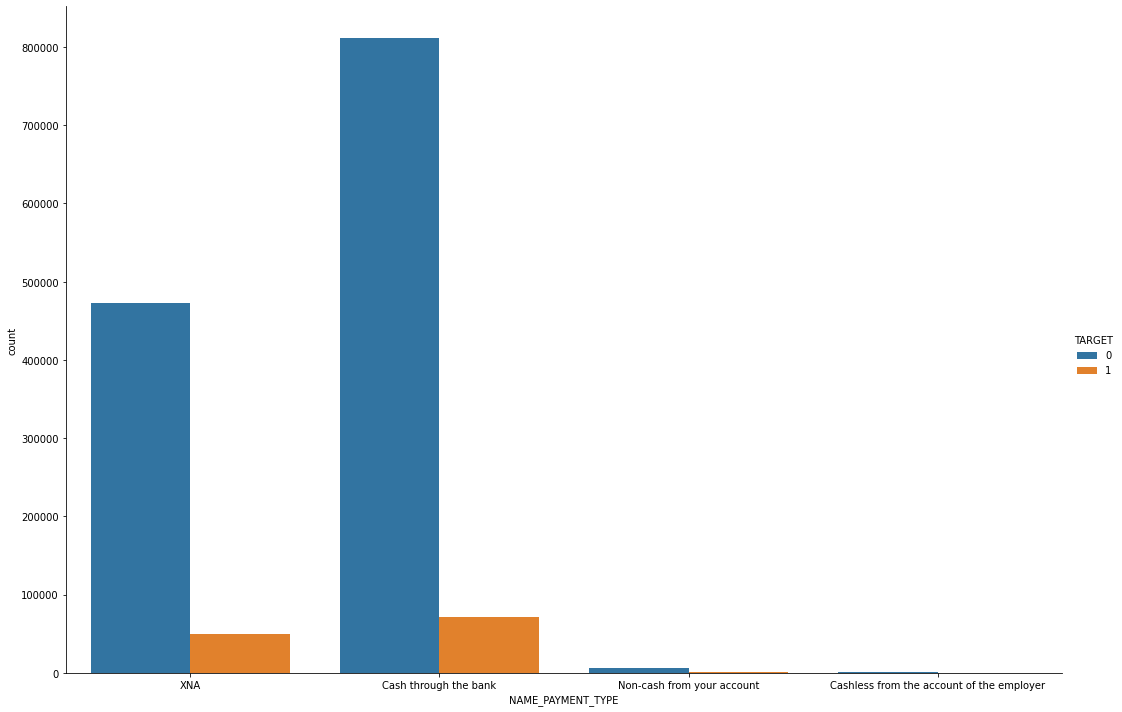

In [34]:
sns.catplot(x='NAME_PAYMENT_TYPE', kind="count",hue='TARGET', data=previous_application, aspect=1.5, height=10)

* XNA semble plus risque

<h2>TARGET / CODE_REJECT_REASON (code de rejet)</h2>

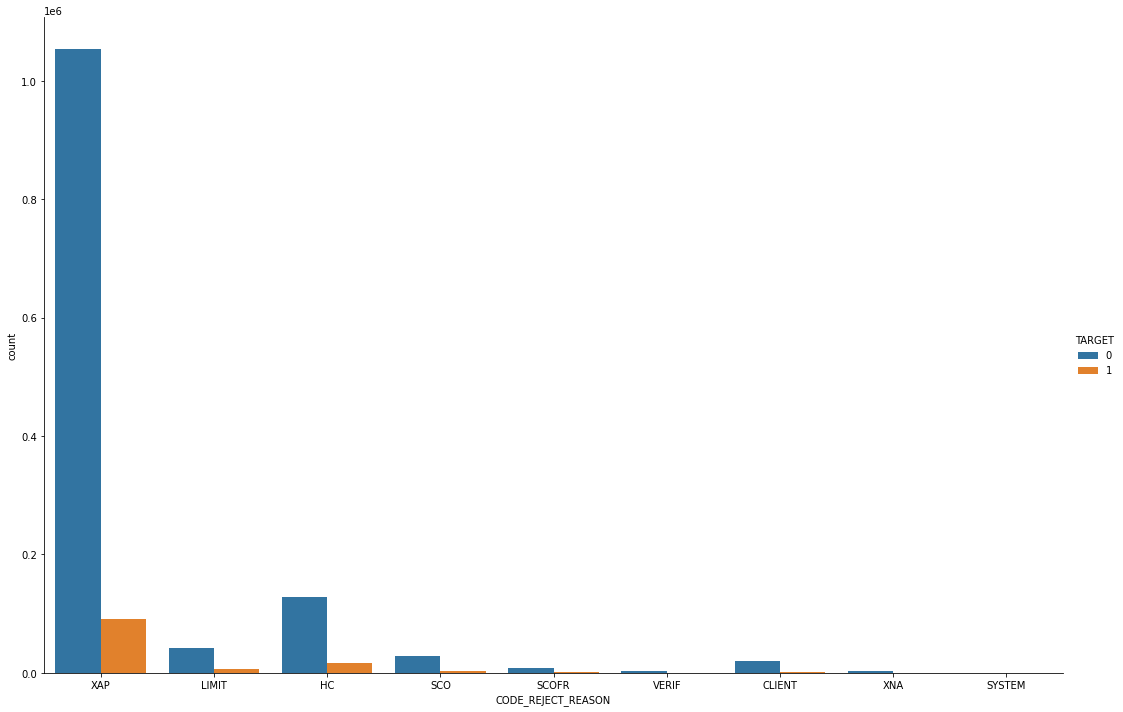

In [35]:
sns.catplot(x='CODE_REJECT_REASON', kind="count",hue='TARGET', data=previous_application, aspect=1.5, height=10)

<h2>TARGET / NAME_CLIENT_TYPE </h2>

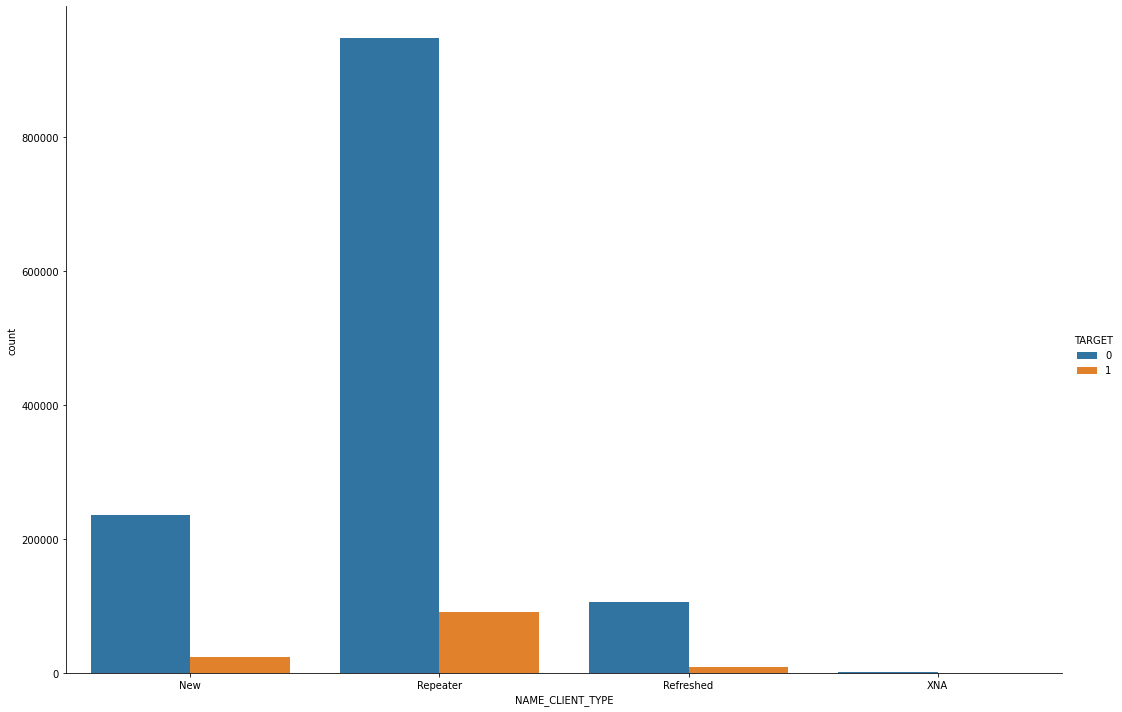

In [36]:
sns.catplot(x='NAME_CLIENT_TYPE', kind="count",hue='TARGET', data=previous_application, aspect=1.5, height=10)

* Rien à conclure

<h2>TARGET / NFLAG_INSURED_ON_APPROVAL (demande s'assurence)</h2>

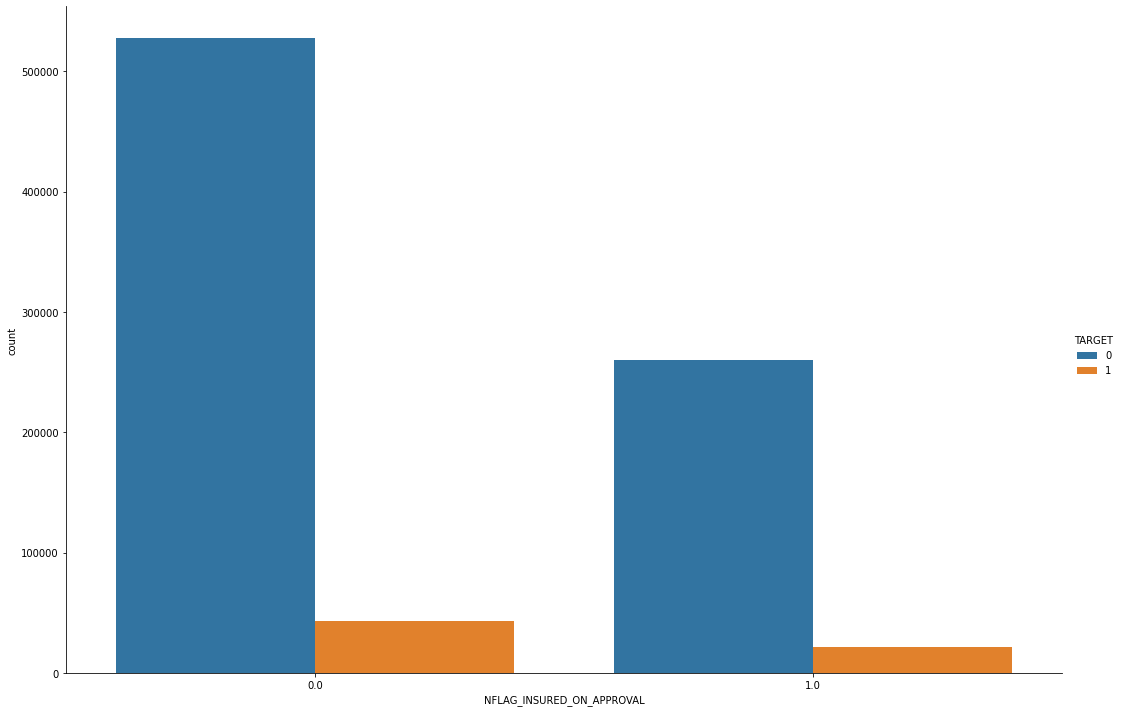

In [37]:
sns.catplot(x='NFLAG_INSURED_ON_APPROVAL', kind="count",hue='TARGET', data=previous_application, aspect=1.5, height=10)

* Ce qui demande une assurence semble plus risque